<a href="https://colab.research.google.com/github/POJSpace/Deep_learning_pytorch/blob/main/resources/01_pytorch_model1_PojSpace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
what_are_we_covering = {1: "data (prepare and load)",
                    2: "build model",
                    3: "fiting the model to data",
                    4: "evalueting model",
                    5: "saving and loading the model",
                    6: "putting it all together"}

# First Neural Network Model

In [45]:
import torch
from torch import nn # neural network graphs

torch.__version__

'2.1.0+cu118'

In [46]:
# Create known parameters for linear
a = 0.7
b = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(1) # if you unsqueeze it on 1.dimension you get najs output of numbers, it makes najs list
y = b + a * X # normal Linear function

X_original = torch.arange(start,end,step)

X[:10], y[:10], X_original[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800]))

In [47]:
train_split = int(0.8 * len(X)) # make 80%

X_train, y_train = X[:train_split], y[:train_split] # make train dataset for x and y 80%
X_test, y_test = X[train_split:], y[train_split:] # make test dataset for x and y 20%

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [48]:
import matplotlib.pyplot as plt

def plt_predictions(train_data : torch.Tensor = X_train,
                     train_labels : torch.Tensor = y_train,
                     test_data : torch.Tensor = X_test,
                     test_labels : torch.Tensor = y_test,
                     predictions : torch.Tensor = None):
  """
  Plots training data, test data amd compares predictions.

  """
  plt.figure(figsize=(10,7)) # Size of a plot

  plt.scatter(train_data, train_labels, c = "b", s = 4, label = "Training data") # draw dots from our tensor, plot dots with x and y position

  plt.scatter(test_data, test_labels, c = "g", s = 4, label = "Testing data")


  if predictions is not None:
    plt.scatter(test_data,predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 10})

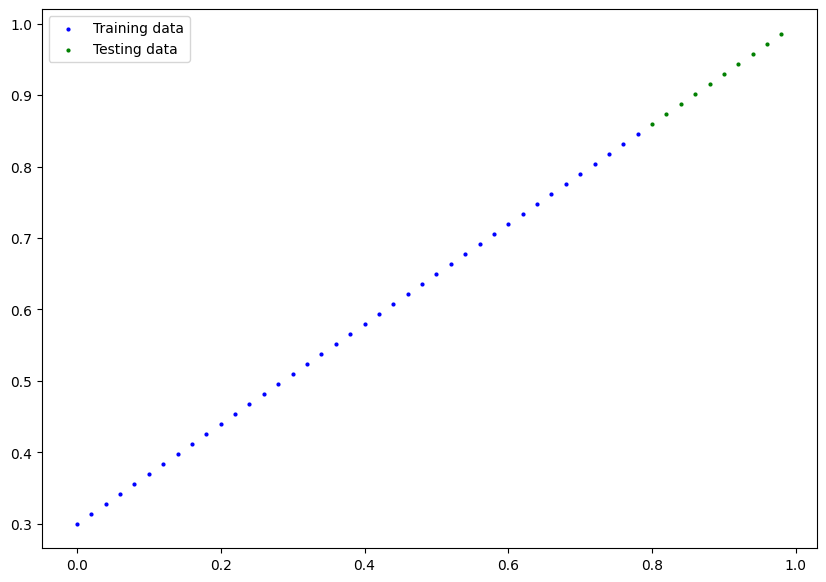

In [49]:
plt_predictions() # we can use it without parameters because a default one are same as ours

# 1. Model


In [50]:
# Create liner regression model class
class LinearRegressionModule(nn.Module): # <- everythink in PyTorch inherit from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                           requires_grad = True, #<- this tels that we can manipulate and change the variable
                                           dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                        requires_grad=True,
                                        dtype = torch.float))

    # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:# <- We need to overwrite this metod
    return self.weights * x + self.bias


In [51]:
torch.manual_seed(42) # it makes 1 seed and random functions will be same every time, it is used if you want to have same result as someone else

# Create an instance of the model

model_0 = LinearRegressionModule()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

# Making Predictions

In [52]:
# Make predictions with models

with torch.inference_mode(): #<- this is lot faster if we dont need gradient
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

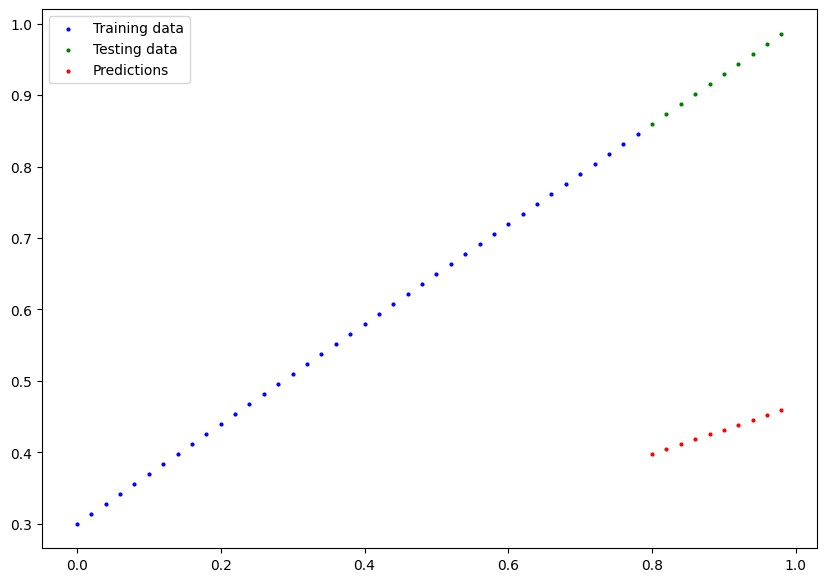

In [53]:
plt_predictions(predictions=y_preds)

# Learning


In [54]:
# We need to use loss function
loss_fn = nn.L1Loss()


#Setup an optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)

### Building a training loop (and testing)

0. Loop through the data

1. Forward pass goes through model

2. Calculate the loss

3. Optimize

4. Loss backward like a reverse engeneering

5. Optimizer step - Gradient descent

In [55]:
torch.manual_seed(42)

epochs = 150

epoch_count = []
loss_values = []
test_loss_values = []


for epoch in range(epochs):

  ### Training
  model_0.train()

  # 1. Forward pass = push data trought model
  y_pred = model_0(X_train)

  # 2. Loss
  loss = loss_fn(y_pred, y_train)

  # 3. optimizer
  optimizer.zero_grad() # <-- now I got it. It means that it zeros the gradient that exist before because otherwise the gradient would be a combination of the old and new gradient, which you have already used to update your model parameters

  # 4. backpropagation
  loss.backward() # <-- updating the Weights and biases by given gradient

  #5. Step optimizer
  optimizer.step() # <-- optimalize loss by given learning rate



  ### Testing
  model_0.eval() #<- turns of difrent settings

  with torch.inference_mode():
    # 1. ForwardPass
    test_preds = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_preds, y_test)


  epoch_count.append(epoch)
  loss_values.append(loss)
  test_loss_values.append(test_loss)

  print(f"Epoch: {epoch + 1} | Loss: {loss} | Test loss: {loss}")


Epoch: 1 | Loss: 0.31288138031959534 | Test loss: 0.31288138031959534
Epoch: 2 | Loss: 0.3013603389263153 | Test loss: 0.3013603389263153
Epoch: 3 | Loss: 0.28983935713768005 | Test loss: 0.28983935713768005
Epoch: 4 | Loss: 0.2783183455467224 | Test loss: 0.2783183455467224
Epoch: 5 | Loss: 0.26679736375808716 | Test loss: 0.26679736375808716
Epoch: 6 | Loss: 0.2552763521671295 | Test loss: 0.2552763521671295
Epoch: 7 | Loss: 0.24375534057617188 | Test loss: 0.24375534057617188
Epoch: 8 | Loss: 0.23223432898521423 | Test loss: 0.23223432898521423
Epoch: 9 | Loss: 0.22071333229541779 | Test loss: 0.22071333229541779
Epoch: 10 | Loss: 0.20919232070446014 | Test loss: 0.20919232070446014
Epoch: 11 | Loss: 0.1976713240146637 | Test loss: 0.1976713240146637
Epoch: 12 | Loss: 0.18615034222602844 | Test loss: 0.18615034222602844
Epoch: 13 | Loss: 0.1746293306350708 | Test loss: 0.1746293306350708
Epoch: 14 | Loss: 0.16310831904411316 | Test loss: 0.16310831904411316
Epoch: 15 | Loss: 0.15158

In [56]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

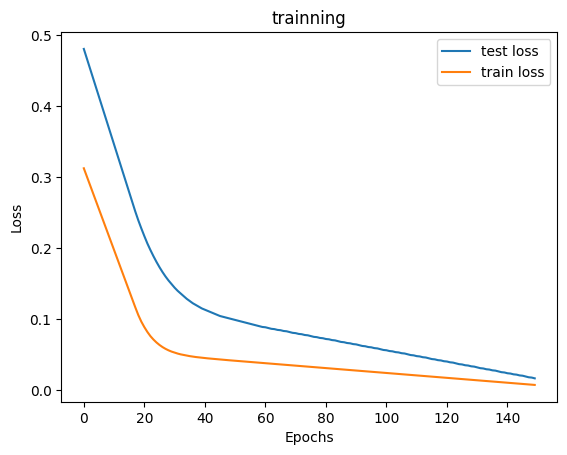

In [57]:
plt.plot(epoch_count, torch.tensor(test_loss_values).cpu().numpy(), label = "test loss") #function plot gets only tensors in cpu and not pytorch tensors but numpys tensor so because this we need to do this: torch.tensor(test_loss_values).cpu().numpy()
plt.plot(epoch_count, torch.tensor(loss_values).cpu().numpy(), label = "train loss")
plt.title("trainning") # title
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

(None, None)

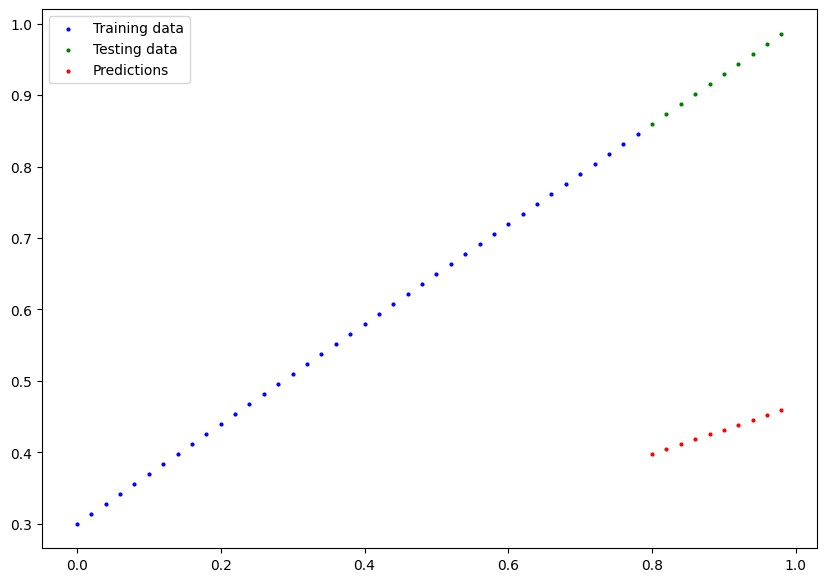

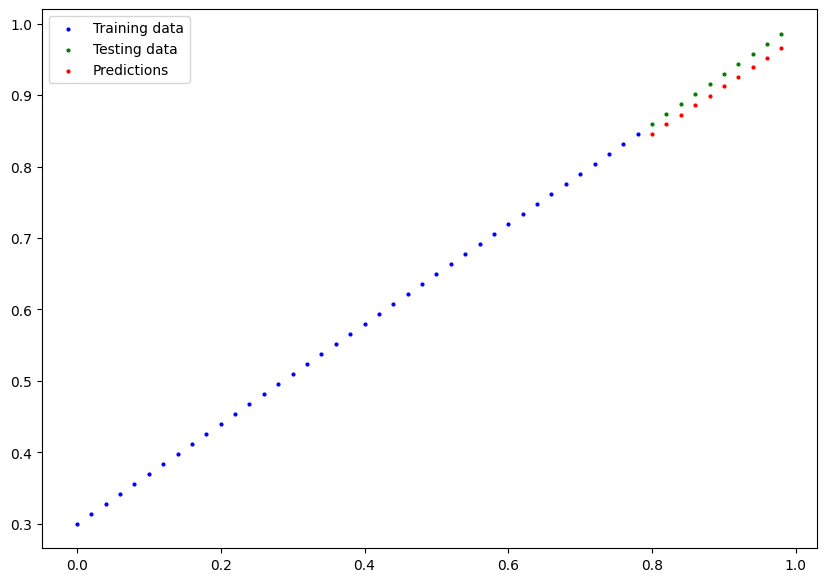

In [58]:
plt_predictions(predictions=y_preds), plt_predictions(predictions=y_preds_new)


## Saving models in PyTorch

1. torch.save() - save PyTorch project to pytohon pickle format
2. torch.load() - load project
3. torch.nn.Module.load_state_dic() - this allowes saves your models in state dic

In [59]:
# Saving our PyTorch modul
from pathlib import Path

model_path = Path("models") # get the path
model_path.mkdir(parents = True, exist_ok = True) # make a dir

model_name = "01_PyTorch_workflow_model_0.pth"
model_save_path = model_path / model_name # path to the file

torch.save(model_0.state_dict(), model_save_path) # save a model to given path

In [60]:
torch.load(model_save_path) # our saved model

OrderedDict([('weights', tensor([0.6638])), ('bias', tensor([0.3153]))])

In [61]:
model_0.state_dict() # our model in RAM

OrderedDict([('weights', tensor([0.6638])), ('bias', tensor([0.3153]))])

In [62]:
loaded_model_0 = LinearRegressionModule() # if we load our model we just have a params of it, we also need a model structure

loaded_model_0.load_state_dict(torch.load(model_save_path)) # now we load a params to model structure

<All keys matched successfully>

In [63]:
loaded_model_0.state_dict() # get the params

OrderedDict([('weights', tensor([0.6638])), ('bias', tensor([0.3153]))])

In [65]:
# How to make predictions
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

y_preds_new == loaded_model_preds # we can compare a results from our model and saved model

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])